In [ ]:
# import the libraries
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset, both train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [78]:
# get the class distributions
train_dist = dict(Counter(y_train))
test_dist = dict(Counter(y_test))

# get the basic statistics
train_mean = np.mean(x_train)
train_std = np.std(x_train)
test_mean = np.mean(x_test)
test_std = np.std(x_test)

# display basic statistics
print("Training Data Statistics:")
print(f"Mean Pixel Value: {train_mean:.4f}, Standard Deviation: {train_std:.4f}")
print("Test Data Statistics:")
print(f"Mean Pixel Value: {test_mean:.4f}, Standard Deviation: {test_std:.4f}")

Training Data Statistics:
Mean Pixel Value: 33.3184, Standard Deviation: 78.5675
Test Data Statistics:
Mean Pixel Value: 33.7912, Standard Deviation: 79.1725


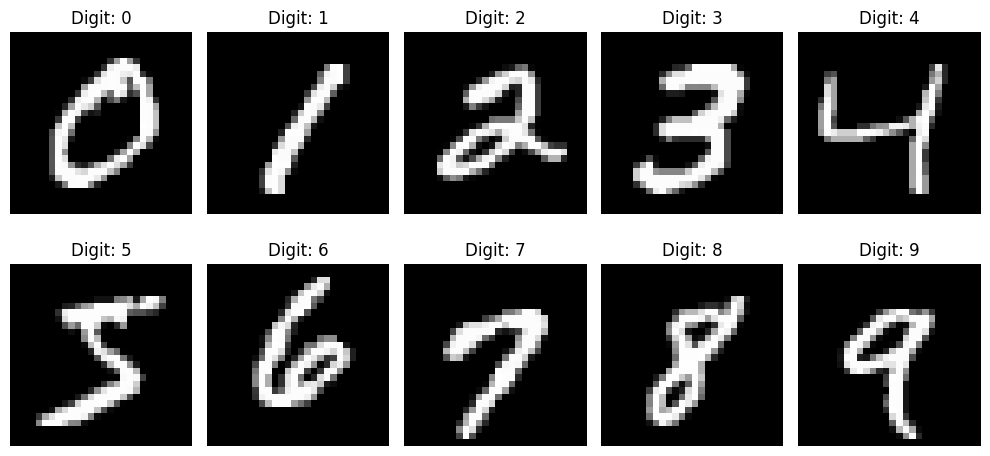

In [79]:
# show a sample for each digit

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for digit in range(10):
    index = np.where(y_train == digit)[0][0]  # get a sample for each digit
    ax = axes[digit // 5, digit % 5]
    ax.imshow(x_train[index], cmap='gray')
    ax.set_title(f"Digit: {digit}")
    ax.axis('off')

plt.tight_layout()
plt.savefig("digit_subplots.pdf", dpi=300)
plt.show()

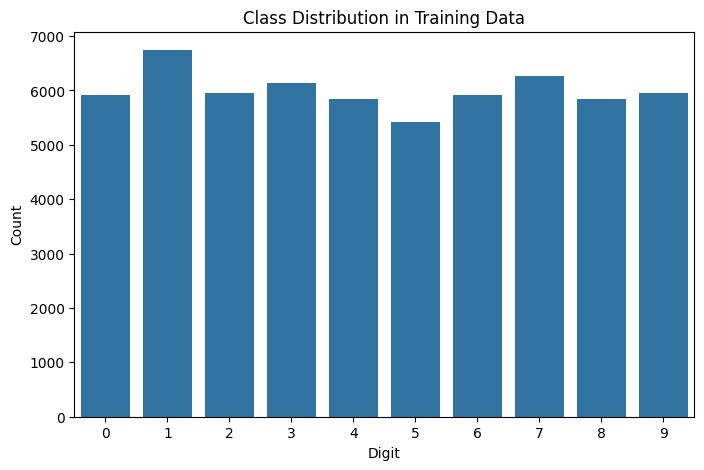

In [80]:
# show the class distributions for training data

plt.figure(figsize=(8, 5))
sns.barplot(x=list(train_dist.keys()), y=list(train_dist.values()))
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.savefig("class_dist_train.pdf", dpi=300)
plt.show()


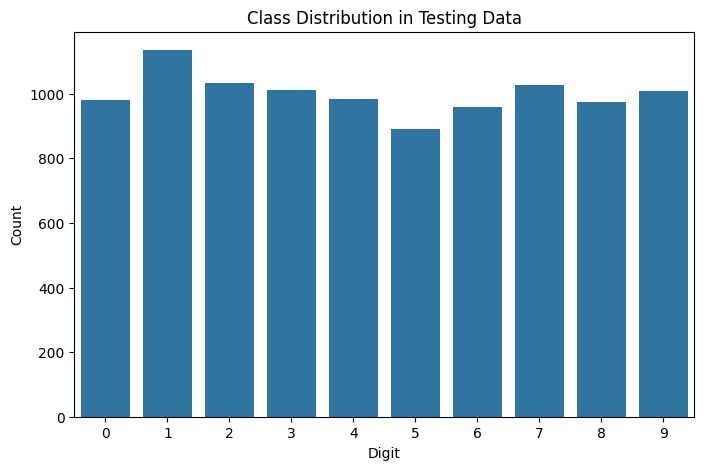

In [81]:
# show the class distributions for testing data

plt.figure(figsize=(8, 5))
sns.barplot(x=list(test_dist.keys()), y=list(test_dist.values()))
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Class Distribution in Testing Data")
plt.savefig("class_dist_test.pdf", dpi=300)
plt.show()


In [82]:
# split the training data into validation / train

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print(f"Training Set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Validation Set: {x_val.shape}, Labels: {y_val.shape}")
print(f"Test Set: {x_test.shape}, Labels: {y_test.shape}")


Training Set: (48000, 28, 28), Labels: (48000,)
Validation Set: (12000, 28, 28), Labels: (12000,)
Test Set: (10000, 28, 28), Labels: (10000,)


In [83]:
# preprocessing

# normalize the images so that they range from 0 to 1
x_train = x_train.astype("float32") / 255.0
x_val = x_val.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# explanation:
## largest value possible is 255. 255/255 is 1.
## lowest value possible is 0. 0/255 is 0.
## all the other values in between will be calculated with the same logic.

In [84]:
# import the libraries for KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# flatten the images for KNN since it expects feature vectors and not 2D images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)

# k-values to experiment
k_values = [1, 3, 5, 7, 9]
validation_accuracies = []

# experiment with each k-value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)
    y_val_pred = knn.predict(x_val_flat)
    accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(accuracy)
    print(f"k = {k}, Validation Accuracy = {accuracy:.4f}")


k = 1, Validation Accuracy = 0.9704
k = 3, Validation Accuracy = 0.9703
k = 5, Validation Accuracy = 0.9675
k = 7, Validation Accuracy = 0.9663
k = 9, Validation Accuracy = 0.9654


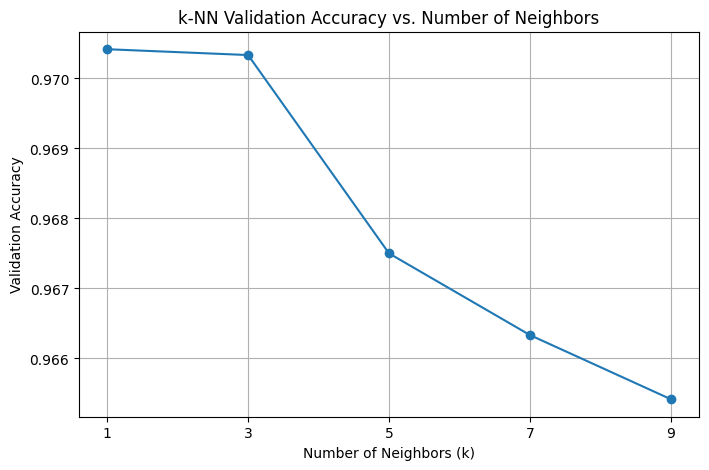

In [86]:
# plot the validation vs k data

plt.figure(figsize=(8, 5))
plt.plot(k_values, validation_accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.title("k-NN Validation Accuracy vs. Number of Neighbors")
plt.xticks(k_values)
plt.grid(True)
plt.savefig("knn_k_vs_val.pdf", dpi=300)
plt.show()


In [87]:
# we can observe from the plot that the best k value is 1
best_k = 1

# combine the validation and training sets
x_final_train = np.vstack((x_train, x_val))
y_final_train = np.hstack((y_train, y_val))

# flatten, as before
x_final_train_flat = x_final_train.reshape(x_final_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [88]:
# train the model
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(x_final_train_flat, y_final_train)

# predict on test set
y_test_pred = final_knn.predict(x_test_flat)

In [89]:
# import the libraries for confusion matrix etc.
from sklearn.metrics import classification_report, confusion_matrix
import random

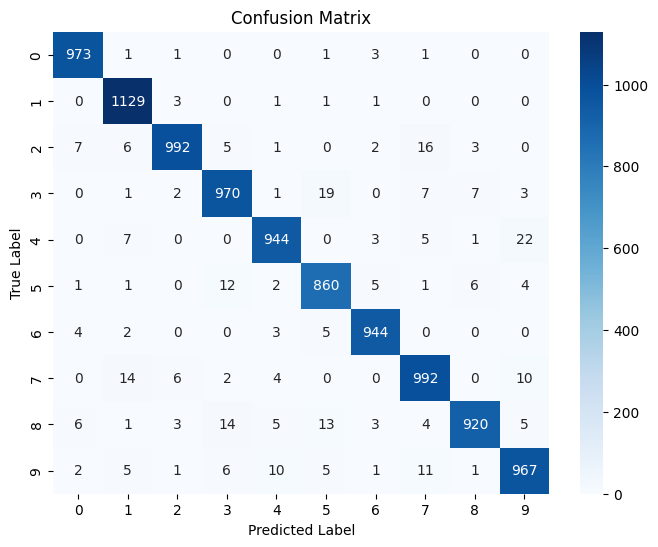

Final Model Performance on Test Set:
              precision    recall  f1-score   support

           0     0.9799    0.9929    0.9863       980
           1     0.9674    0.9947    0.9809      1135
           2     0.9841    0.9612    0.9725      1032
           3     0.9613    0.9604    0.9609      1010
           4     0.9722    0.9613    0.9667       982
           5     0.9513    0.9641    0.9577       892
           6     0.9813    0.9854    0.9833       958
           7     0.9566    0.9650    0.9608      1028
           8     0.9808    0.9446    0.9623       974
           9     0.9565    0.9584    0.9574      1009

    accuracy                         0.9691     10000
   macro avg     0.9691    0.9688    0.9689     10000
weighted avg     0.9692    0.9691    0.9691     10000



In [90]:
# plot the confusion matrix, give the classification report
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("knn_conf_matrix.pdf", dpi=300)
plt.show()

print("Final Model Performance on Test Set:")
print(classification_report(y_test, y_test_pred, digits=4))

The macro averaged precision, recall and f1 are given, as well as the accuracy on the table above

In [91]:
# identify the most misclassified digit
misclassified_counts = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
most_misclassified_digits = np.argsort(misclassified_counts)[::-1]

print("Misclassified Digits (Most to Least):")
for i in range(10):  # Show top 3 most misclassified digits
    print(f"Digit {most_misclassified_digits[i]} was misclassified {misclassified_counts[most_misclassified_digits[i]]} times.")


Misclassified Digits (Most to Least):
Digit 8 was misclassified 54 times.
Digit 9 was misclassified 42 times.
Digit 3 was misclassified 40 times.
Digit 2 was misclassified 40 times.
Digit 4 was misclassified 38 times.
Digit 7 was misclassified 36 times.
Digit 5 was misclassified 32 times.
Digit 6 was misclassified 14 times.
Digit 0 was misclassified 7 times.
Digit 1 was misclassified 6 times.


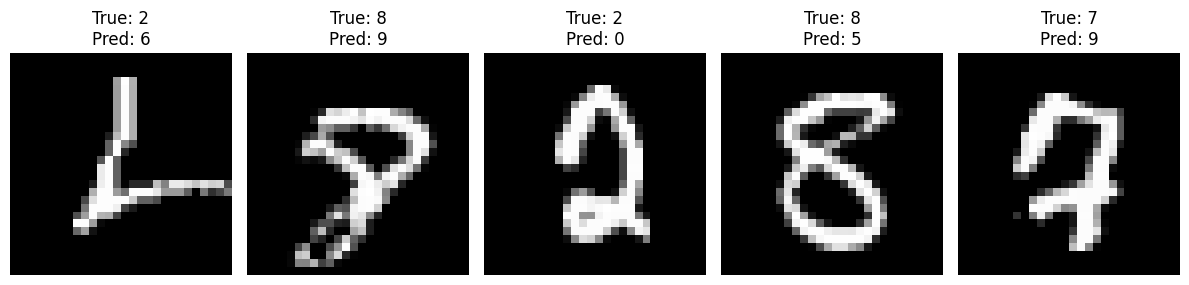

In [ ]:
# show 5 random misclassified examples

misclassified_indices = np.where(y_test != y_test_pred)[0]
random_misclassified = random.sample(list(misclassified_indices), 5)

fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i, idx in enumerate(random_misclassified):
    axes[i].imshow(x_test[idx], cmap='gray')
    axes[i].set_title(f"True: {y_test[idx]}\nPred: {y_test_pred[idx]}")
    axes[i].axis('off')

plt.tight_layout()
plt.savefig("knn_misclassified.pdf", dpi=300)
plt.show()


In [93]:
# import needed libraries
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [94]:
# parameters to try out
max_depth_values = [2, 5, 10]
min_samples_split_values = [2, 5]

# array to store the results
dt_results = []

In [95]:
# try out the parameters

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        dt.fit(x_train_flat, y_train)
        y_val_pred = dt.predict(x_val_flat)
        accuracy = accuracy_score(y_val, y_val_pred)
        dt_results.append((max_depth, min_samples_split, accuracy))
        print(f"max_depth={max_depth}, min_samples_split={min_samples_split}, Validation Accuracy={accuracy:.4f}")

df_results = pd.DataFrame(dt_results, columns=["Max Depth", "Min Samples Split", "Validation Accuracy"])
print("\nDecision Tree Hyperparameter Tuning Results:")
print(df_results)

max_depth=2, min_samples_split=2, Validation Accuracy=0.3342
max_depth=2, min_samples_split=5, Validation Accuracy=0.3342
max_depth=5, min_samples_split=2, Validation Accuracy=0.6805
max_depth=5, min_samples_split=5, Validation Accuracy=0.6805
max_depth=10, min_samples_split=2, Validation Accuracy=0.8538
max_depth=10, min_samples_split=5, Validation Accuracy=0.8530

Decision Tree Hyperparameter Tuning Results:
   Max Depth  Min Samples Split  Validation Accuracy
0          2                  2              0.33425
1          2                  5              0.33425
2          5                  2              0.68050
3          5                  5              0.68050
4         10                  2              0.85375
5         10                  5              0.85300


In [96]:
# select the best parameters

best_params = df_results.loc[df_results["Validation Accuracy"].idxmax()]
best_max_depth = int(best_params["Max Depth"])
best_min_samples_split = int(best_params["Min Samples Split"])

In [97]:
# train with the full training set, test with the test set

x_final_train = np.vstack((x_train, x_val))
y_final_train = np.hstack((y_train, y_val))

x_final_train_flat = x_final_train.reshape(x_final_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

final_dt = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
final_dt.fit(x_final_train_flat, y_final_train)

y_test_pred = final_dt.predict(x_test_flat)

In [98]:
print("\nFinal Model Performance on Test Set:")
print(classification_report(y_test, y_test_pred, digits=4))


Final Model Performance on Test Set:
              precision    recall  f1-score   support

           0     0.9116    0.9367    0.9240       980
           1     0.9478    0.9595    0.9536      1135
           2     0.8521    0.8372    0.8446      1032
           3     0.8180    0.8366    0.8272      1010
           4     0.8632    0.8483    0.8557       982
           5     0.8415    0.8038    0.8222       892
           6     0.9134    0.8695    0.8909       958
           7     0.9015    0.8813    0.8913      1028
           8     0.7974    0.8121    0.8047       974
           9     0.8095    0.8593    0.8337      1009

    accuracy                         0.8663     10000
   macro avg     0.8656    0.8644    0.8648     10000
weighted avg     0.8668    0.8663    0.8663     10000



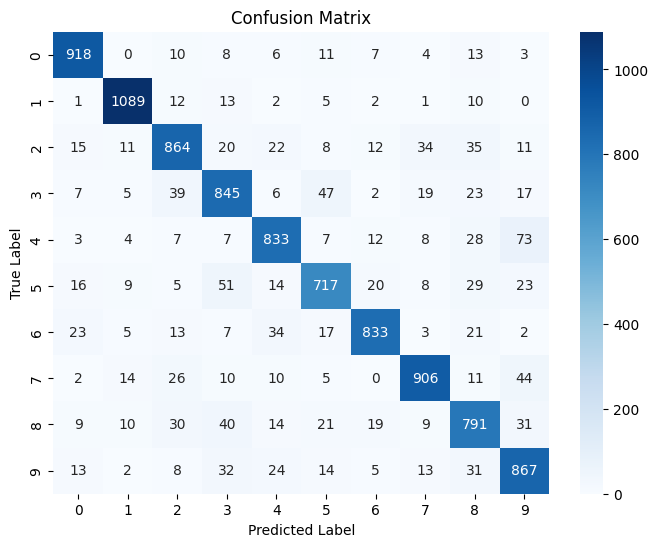

In [99]:
# show confusion matrix

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("dt_conf.pdf", dpi=300)
plt.show()


In [100]:
# show the misclassification data

misclassified_counts = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
most_misclassified_digits = np.argsort(misclassified_counts)[::-1]

print("\nMost Frequently Misclassified Digits:")
for i in range(10):
    print(f"Digit {most_misclassified_digits[i]} was misclassified {misclassified_counts[most_misclassified_digits[i]]} times.")



Most Frequently Misclassified Digits:
Digit 8 was misclassified 183 times.
Digit 5 was misclassified 175 times.
Digit 2 was misclassified 168 times.
Digit 3 was misclassified 165 times.
Digit 4 was misclassified 149 times.
Digit 9 was misclassified 142 times.
Digit 6 was misclassified 125 times.
Digit 7 was misclassified 122 times.
Digit 0 was misclassified 62 times.
Digit 1 was misclassified 46 times.


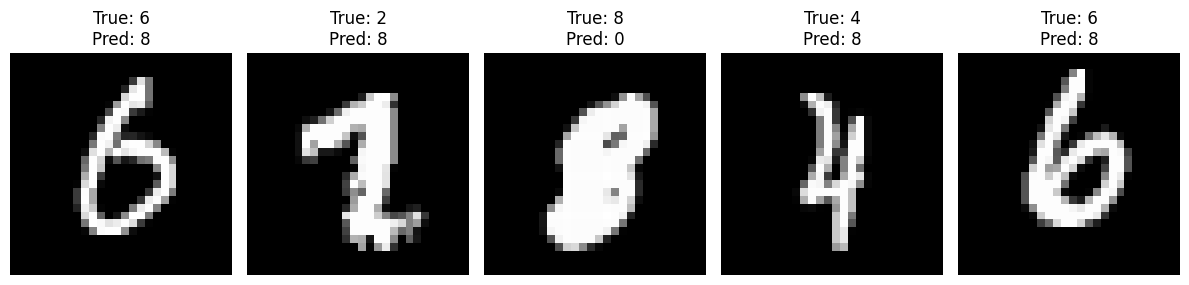

In [101]:
# display misclassified examples

misclassified_indices = np.where(y_test != y_test_pred)[0]
random_misclassified = random.sample(list(misclassified_indices), 5)

fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i, idx in enumerate(random_misclassified):
    axes[i].imshow(x_test[idx], cmap='gray')
    axes[i].set_title(f"True: {y_test[idx]}\nPred: {y_test_pred[idx]}")
    axes[i].axis('off')

plt.tight_layout()
plt.savefig("dt_misclassification_random.pdf", dpi=300)
plt.show()


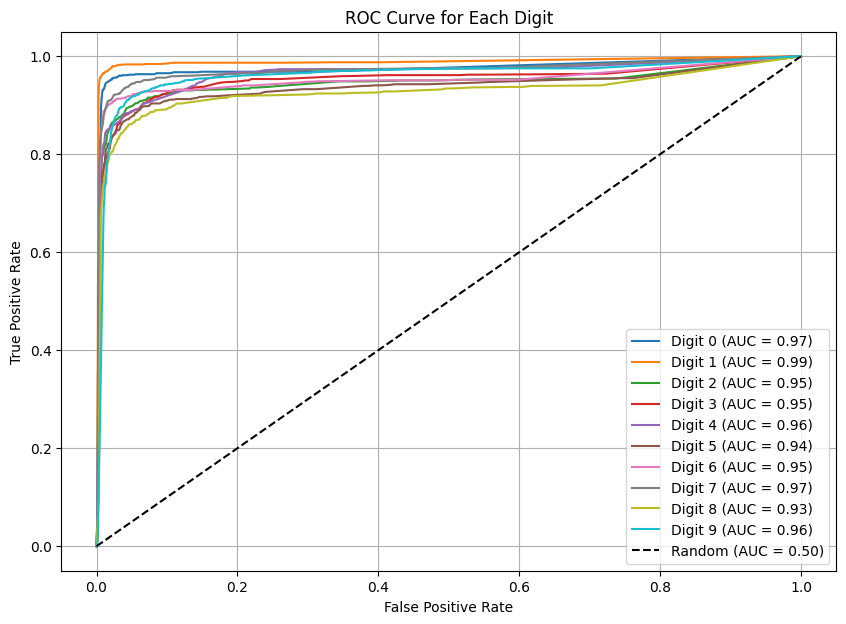

In [103]:
# imports for roc auc

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.arange(10))
y_test_pred_prob = final_dt.predict_proba(x_test_flat)

plt.figure(figsize=(10, 7))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Digit {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Digit")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("roc_auc.pdf")
plt.show()
